In [11]:
from keras.models import load_model

In [12]:
# load model
model = load_model('200_model.h5')
# summarize model.
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [13]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [14]:
import os
import cv2

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Populating the interactive namespace from numpy and matplotlib


In [16]:
import numpy as np
from os import listdir
from os.path import isfile,join

In [22]:
img_row=200
img_col=200



In [23]:
actors_dataset_dict={'[0]':'Amir Khan',
                     '[1]':'Akshay kumar',
                     '[2]':'Hritik Roshan',
                     '[3]':'Kajal Agarwal',
                     '[4]':'Kareena Kapoor',
                     '[5]':'Katrina Kaif',
                     '[6]':'Madhuri Dixit',
                     '[7]':'Salman Khan',
                     '[8]':'ShahRukh Khan',
                     '[9]':'Shilpa Shetty'
                    }


In [24]:
def draw_test(name,pred,im):
    actor=actors_dataset_dict[str(pred)]
    expanded_image=cv2.copyMakeBorder(im,80,0,0,100,cv2.BORDER_CONSTANT,value=[0,0,0])
    cv2.putText(expanded_image,actor,(0,40),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.imshow(name,expanded_image)

In [40]:
def get_random_image(path):
    folders=list(filter(lambda x:os.path.isdir(os.path.join(path,x)),os.listdir(path)))
    random_dir=np.random.randint(0,len(folders))
    path_class=folders[random_dir]
    #print('Class - ',path_class)
    file_path=path+path_class
    file_names=[f for f in listdir(file_path) if isfile(join(file_path,f))]
    random_file_index=np.random.randint(0,len(file_names))
    image_name=file_names[random_file_index]
    return (cv2.imread(file_path+'/'+image_name),file_path+'/'+image_name,path_class)

Predicted -Kareena Kapoor
Actual ShahRukh Khan


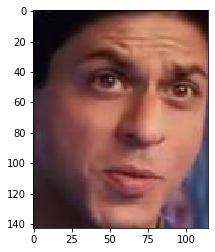

In [42]:
input_im,im_path,class_name=get_random_image('Bollywood_Dataset/Bollywood_Dataset/validation/')
input_org=input_im.copy()
input_org=cv2.resize(input_org,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_LINEAR)

input_im=cv2.resize(input_im,(img_row,img_col),interpolation=cv2.INTER_LINEAR)
input_im=input_im/255.
input_im=input_im.reshape(1,img_row,img_col,3)

res=np.argmax(model.predict(input_im,1,verbose=0),axis=1)

print('Predicted -'+actors_dataset_dict[str(res)])
print('Actual '+class_name)
img=mpimg.imread(im_path)
imgplot = plt.imshow(img)
plt.show()

# draw_test('Prediction',res,input_org)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()

In [ ]:
correct=0
for i in range(200):
    input_im,im_path,class_name=get_random_image('Bollywood_Dataset/Bollywood_Dataset/validation/')
    input_org=input_im.copy()
    input_org=cv2.resize(input_org,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_LINEAR)

    input_im=cv2.resize(input_im,(img_row,img_col),interpolation=cv2.INTER_LINEAR)
    input_im=input_im/255.
    input_im=input_im.reshape(1,img_row,img_col,3)

    res=np.argmax(model.predict(input_im,1,verbose=0),axis=1)

    pred=actors_dataset_dict[str(res)]
    if pred==class_name:
        correct+=1
print('Correctly predicted ',correct,'out of 100')
#     print('Predicted -'+actors_dataset_dict[str(res)])
#     img=mpimg.imread(im_path)
#     imgplot = plt.imshow(img)
#     plt.show()

